In [1]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

### Extract pickle

In [25]:
import pickle
with open('vrp_100_e_1000.pkl.bak', 'rb') as f:
    x = pickle.load(f)

In [3]:
locations = x['problem'].locations # x,y for customers

In [5]:
solution = x['solutions'][-1] # list with next cutomers

In [6]:
solution

[[0, 28, 94, 72, 98, 91, 74, 35, 44, 0],
 [0, 95, 13, 54, 41, 78, 67, 33, 85, 36, 77, 18, 0],
 [0, 48, 21, 38, 14, 52, 60, 46, 25, 0],
 [0, 5, 83, 22, 50, 58, 10, 51, 66, 43, 69, 0],
 [0, 53, 89, 19, 2, 57, 63, 45, 92, 26, 0],
 [0, 76, 32, 37, 56, 27, 31, 55, 71, 0],
 [0, 86, 20, 82, 12, 17, 80, 16, 88, 93, 29, 49, 0],
 [0, 59, 87, 64, 97, 40, 96, 4, 42, 11, 62, 0],
 [0, 84, 90, 61, 24, 3, 30, 6, 70, 0],
 [0, 9, 1, 47, 15, 81, 100, 8, 68, 0],
 [0, 65, 34, 23, 39, 79, 99, 75, 73, 7, 0],
 [0, 0]]

In [28]:
capacities = x['problem'].capacities # cap for customers
capacities[0] = 0

In [8]:
distances = x['problem'].distance_matrix # matrix with distances

In [9]:
x['distances'].index(min(x['distances']))

820

####  distance_matrix: An array of distances between locations on meters.
#### num_locations: The number of locations.
#### num_vehicles: The number of vehicles in the fleet.
#### depot: The index of the depot, the location where all vehicles start and end their routes.

In [12]:
original_list = locations

In [13]:
rounded_list = [[int((round(element*100, 2))) for element in row] for row in original_list]

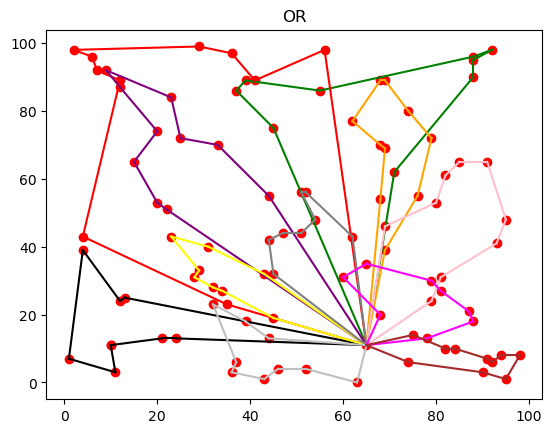

In [37]:
import matplotlib.pyplot as plt

points = rounded_list
routes = [[0], [0, 59, 87, 64, 33, 100, 81, 8, 15, 52, 0], [0, 94, 24, 22, 51, 58, 10, 96, 40, 97, 67, 0], [0, 62, 11, 42, 4, 50, 83, 5, 66, 43, 69, 0], [0, 60, 77, 36, 85, 78, 41, 68, 54, 14, 18, 0], [0, 92, 63, 9, 1, 47, 13, 95, 38, 21, 0], [0, 17, 29, 93, 88, 80, 16, 3, 90, 61, 0], [0, 84, 72, 74, 98, 91, 44, 35, 32, 0], [0, 76, 37, 56, 71, 55, 27, 31, 46, 0], [0, 70, 49, 86, 20, 12, 82, 30, 6, 28, 0], [0, 89, 19, 2, 57, 45, 48, 25, 26, 0], [0, 53, 65, 34, 23, 39, 79, 99, 75, 73, 7, 0]]
data = capacities

x, y = zip(*points)

plt.scatter(x, y, color='red', marker='o')
route_colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'black', 'yellow', 'grey', 'silver', 'magenta', 'brown', 'indigo']

for index,route in enumerate(routes):
    color = route_colors[index % len(route_colors)] 

    for i in range(len(route) - 1):
        plt.plot([x[route[i]], x[route[i + 1]]], [y[route[i]], y[route[i + 1]]], color=color)

    plt.plot([x[route[-1]], x[route[0]]], [y[route[-1]], y[route[0]]], color='blue')

# for i, txt in enumerate(range(len(x))):
#     plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    
    
# for i, txt in enumerate(data):
#     plt.annotate(f"({txt})", (x[i], y[i]), textcoords="offset points", xytext=(10, 10), ha='center')

plt.title('OR')
plt.savefig('OR_20_500.png')
plt.show()


### start for paper

In [19]:
matrix = distances

In [20]:
len(matrix)

101

In [21]:
def float_to_int(z):
    for i, x in enumerate(z):
        for ii, y in enumerate(x):
            
            z[i][ii] = int(y *100)
    return z


In [22]:
matrix_dist = float_to_int(matrix)
matrix_dist

[[0,
  47,
  23,
  67,
  83,
  77,
  26,
  10,
  86,
  40,
  106,
  66,
  30,
  57,
  45,
  82,
  64,
  40,
  28,
  23,
  24,
  35,
  93,
  26,
  68,
  20,
  9,
  47,
  21,
  44,
  35,
  46,
  29,
  75,
  19,
  44,
  58,
  36,
  44,
  27,
  90,
  77,
  72,
  61,
  52,
  24,
  32,
  60,
  24,
  14,
  98,
  100,
  51,
  10,
  62,
  38,
  37,
  22,
  103,
  67,
  42,
  53,
  49,
  25,
  81,
  17,
  72,
  87,
  69,
  58,
  11,
  36,
  34,
  26,
  37,
  31,
  28,
  57,
  77,
  29,
  54,
  90,
  28,
  92,
  21,
  66,
  20,
  80,
  55,
  12,
  53,
  42,
  18,
  54,
  31,
  52,
  95,
  81,
  41,
  32,
  87],
 [47,
  0,
  28,
  91,
  80,
  78,
  63,
  46,
  47,
  6,
  104,
  65,
  73,
  19,
  19,
  42,
  102,
  78,
  26,
  30,
  69,
  25,
  91,
  41,
  90,
  38,
  38,
  43,
  61,
  81,
  67,
  43,
  53,
  54,
  38,
  63,
  34,
  50,
  15,
  42,
  76,
  47,
  73,
  74,
  71,
  23,
  33,
  18,
  32,
  61,
  96,
  98,
  27,
  39,
  28,
  40,
  47,
  24,
  100,
  56,
  27,
  84,
  51,
  21,
  68,
 

In [29]:
"""Capacited Vehicles Routing Problem (CVRP)."""
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] =  matrix_dist
    data["demands"] = capacities
    data["vehicle_capacities"] = [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
    data["num_vehicles"] = 12
    data["depot"] = 0
    return data

In [30]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    total_distance = 0
    total_load = 0
    sol_all = []
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        sol_part = []
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
            sol_part.append(node_index)
        sol_all.append(sol_part)
        plan_output += f" {manager.IndexToNode(index)} Load({route_load})\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print(f"Total distance of all routes: {total_distance}m")
    print(f"Total load of all routes: {total_load}")
    print(sol_all)


In [42]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.time_limit.seconds = 30
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
#     search_parameters.local_search_metaheuristic = (
#         routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
#     )
    

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


In [43]:
main()

Objective: 1615
Route for vehicle 0:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 1:
 0 Load(0) ->  59 Load(3) ->  87 Load(7) ->  64 Load(11) ->  33 Load(15) ->  100 Load(22) ->  81 Load(25) ->  8 Load(34) ->  15 Load(42) ->  52 Load(50) ->  0 Load(50)
Distance of the route: 227m
Load of the route: 50

Route for vehicle 2:
 0 Load(0) ->  94 Load(1) ->  24 Load(10) ->  22 Load(18) ->  51 Load(24) ->  58 Load(28) ->  10 Load(32) ->  96 Load(35) ->  40 Load(44) ->  97 Load(48) ->  67 Load(49) ->  0 Load(49)
Distance of the route: 273m
Load of the route: 49

Route for vehicle 3:
 0 Load(0) ->  62 Load(6) ->  11 Load(7) ->  42 Load(15) ->  4 Load(22) ->  50 Load(27) ->  83 Load(28) ->  5 Load(35) ->  66 Load(42) ->  43 Load(48) ->  69 Load(49) ->  0 Load(49)
Distance of the route: 205m
Load of the route: 49

Route for vehicle 4:
 0 Load(0) ->  60 Load(5) ->  77 Load(13) ->  36 Load(14) ->  85 Load(20) ->  78 Load(26) ->  41 Load(28) ->  68 Load(

### Distance for RL

In [45]:
import math

def calculate_distance(point1, point2):
    # Oblicz odległość euklidesową między dwoma punktami
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def calculate_total_distance(points, visited_points):
    total_distance = 0

    for i in range(len(visited_points) - 1):
        # Indeksy punktów, które chcemy porównać
        index1 = visited_points[i]
        index2 = visited_points[i + 1]

        # Pobierz współrzędne dla obu punktów
        point1 = points[index1]
        point2 = points[index2]

        # Oblicz odległość między punktami i dodaj do całkowitego dystansu
        distance = calculate_distance(point1, point2)
        total_distance += distance

    return total_distance

# Lista pozycji x i y
positions = rounded_list

# Lista odwiedzanych punktów

visited_points_list = [[0], [0, 59, 87, 64, 33, 100, 81, 8, 15, 52, 0], [0, 94, 24, 22, 51, 58, 10, 96, 40, 97, 67, 0], [0, 62, 11, 42, 4, 50, 83, 5, 66, 43, 69, 0], [0, 60, 77, 36, 85, 78, 41, 68, 54, 14, 18, 0], [0, 92, 63, 9, 1, 47, 13, 95, 38, 21, 0], [0, 17, 29, 93, 88, 80, 16, 3, 90, 61, 0], [0, 84, 72, 74, 98, 91, 44, 35, 32, 0], [0, 76, 37, 56, 71, 55, 27, 31, 46, 0], [0, 70, 49, 86, 20, 12, 82, 30, 6, 28, 0], [0, 89, 19, 2, 57, 45, 48, 25, 26, 0], [0, 53, 65, 34, 23, 39, 79, 99, 75, 73, 7, 0]]
# Oblicz całkowity dystans dla każdej trasy
all_dist = 0
for i, visited_points in enumerate(visited_points_list):
    total_distance = calculate_total_distance(positions, visited_points)
    print(f"Distance for route {i + 1}: {total_distance}")
    all_dist += total_distance
print(all_dist)

Distance for route 1: 0
Distance for route 2: 233.60048310558236
Distance for route 3: 279.0091232301431
Distance for route 4: 209.83934814231907
Distance for route 5: 165.9287946062528
Distance for route 6: 134.26238747074783
Distance for route 7: 178.4678577473086
Distance for route 8: 109.65619098062821
Distance for route 9: 109.74096746873553
Distance for route 10: 98.0585293700932
Distance for route 11: 83.94389310932773
Distance for route 12: 75.93636670027742
1678.443941931416


In [ ]:
1619 RL 1260 OR